In [1]:
!pip install pyvi

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import regex as re
from string import digits
from collections import Counter
from pyvi import ViTokenizer
import nltk
from gensim.models.word2vec import Word2Vec
from keras.utils import to_categorical
%matplotlib inline

In [6]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [38]:
# Hàm tách từ
def custom_tokenizer(content):
  content = ViTokenizer.tokenize(content.lower())
  return content.split()

# Thực hiện xóa các từ stopwords
STOPWORDS = 'stopwords_vietnamese.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)

#Đổi khoảng trắng thành _ để nhận diện xóa stopword khi tách từ
sto1 = []
for item in stopwords:
  t = str(item)
  #t.replace(" ", "_")
  result = '_'.join(t.split())
  sto1.append(result)
sto1 = set(sto1)

def remove_words(words_list, words_to_remove):
    # Chuyển danh sách từ cần xóa thành tập hợp để tăng hiệu suất
    words_to_remove_set = set(words_to_remove)

    # Lọc các từ trong danh sách từ cần xóa ra khỏi danh sách từ
    result = [word for word in words_list if word not in words_to_remove_set]

    return result

import regex as re

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"


def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()

# Hàm chuẩn hóa unicode
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [30]:
# Load dữ liệu từ file CSV
def load_data(csv_file):
    return pd.read_csv(csv_file, sep='\t')

# Đường dẫn đến file CSV của bộ dữ liệu VLSP
file_path = "vlsp_sentiment_train.csv"

# Sử dụng hàm load_data để đọc dữ liệu từ file CSV
train_data = load_data(file_path)

In [31]:
# Đường dẫn đến file CSV của bộ dữ liệu VLSP
file_path = "vlsp_sentiment_test.csv"

# Sử dụng hàm load_data để đọc dữ liệu từ file CSV
test_data = load_data(file_path)

In [40]:
# LABEL CHO TẬP DATASET TRAIN VÀ TEST

label_map = ['Neg', 'Neu', 'Pos']
import csv
with open("vlsp_sentiment_train.csv") as f:
    reader = csv.reader(f)
    l = [row for row in reader]

Neg = []
Neu = []
Pos = []

for i in range(1,len(l)):
  if l[i][0] == '-1':
    Neg.append(1)
    Neu.append(0)
    Pos.append(0)
  elif l[i][0] == '0':
    Neg.append(0)
    Neu.append(1)
    Pos.append(0)
  else:
    Neg.append(0)
    Neu.append(0)
    Pos.append(1)

train_data = train_data.iloc[:len(Neg)].copy()
train_data['Neg'] = Neg
train_data['Neu'] = Neu
train_data['Pos'] = Pos


train_data.head()
#print(len(train_df))

,Class,Data,Neg,Neu,Pos
0,-1,"Mình đã dùng anywhere thế hệ đầu, quả là đầy t...",0,0,1
1,-1,"Quan tâm nhất là độ trễ có cao không, dùng thi...",0,0,1
2,-1,"dag xài con cùi bắp 98k....pin trâu, mỗi tội đ...",0,0,1
3,-1,logitech chắc hàng phải tiền triệu trở lên dùn...,0,0,1
4,-1,"Đang xài con m175 cùi mía , nhà xài nhiều chuộ...",0,0,1


In [41]:
label_map = ['Neg', 'Neu', 'Pos']
import csv
with open("vlsp_sentiment_test.csv") as f:
    reader = csv.reader(f)
    l = [row for row in reader]

Neg = []
Neu = []
Pos = []

for i in range(1,len(l)):
  if l[i][0] == '-1':
    Neg.append(1)
    Neu.append(0)
    Pos.append(0)
  elif l[i][0] == '0':
    Neg.append(0)
    Neu.append(1)
    Pos.append(0)
  else:
    Neg.append(0)
    Neu.append(0)
    Pos.append(1)
test_data = test_data.iloc[:len(Neg)].copy()

test_data['Neg'] = Neg
test_data['Neu'] = Neu
test_data['Pos'] = Pos

test_data.head()
#print(len(train_df))

,Class,Data,Neg,Neu,Pos
0,-1,Nói thiệt là mình thì thì chuột nào mình cũng ...,0,0,1
1,-1,Đang dùng mx1. Cũng ngon nhưng chưa đầy năm mà...,0,0,1
2,-1,"Chưa thấy đc điểm thuyết phục để mua, nhất là ...",0,0,1
3,-1,"Những phần xem báo tra cứu bản đồ, dịch vụ.. d...",0,0,1
4,-1,ĐÚNG LÀ MUA Ở VIỆT NAM KHÔNG ỨNG DỤNG ĐƯỢC GÌ ...,0,0,1


In [42]:
#TÁCH TỪ XÓA STOPWORDS TẬP TRAIN
a = []
for i in range(0,len(train_data)):
  example = str(train_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  example = example.lower()
  t = covert_unicode(example)
  # chuyen thanh tu viet thuong
  t = " ".join(t.split()) #Xoa khoang trang du thua
  #tách từ cho text
  tempt = custom_tokenizer(t)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  a.append(((tempt)))
train_data['Data_words'] = a

#TÁCH TỪ XÓA STOPWORDS TẬP TEST
b = []
for i in range(0,len(test_data)):
  example = str(test_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  example = example.lower()
  t = covert_unicode(example)
  # chuyen thanh tu viet thuong
  t = " ".join(t.split()) #Xoa khoang trang du thua
  #tách từ cho text
  tempt = custom_tokenizer(t)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  b.append(((tempt)))
test_data['Data_words'] = b

In [43]:
#TÁCH TỪ XÓA STOPWORDS TẬP TRAIN CHO CỘT DATA
c = []
for i in range(0,len(train_data)):
  example = str(train_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  #tách từ cho text
  tempt = custom_tokenizer(example)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  sentence = " ".join(tempt)
  c.append(((sentence)))
train_data['Data'] = c

#TÁCH TỪ XÓA STOPWORDS TẬP TEST CHO CỘT DATA
d = []
for i in range(0,len(test_data)):
  example = str(test_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  #tách từ cho text
  tempt = custom_tokenizer(example)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  sentence = " ".join(tempt)
  d.append(((sentence)))
test_data['Data'] = d

In [11]:
test_data

,Class,Data,Neg,Neu,Pos,Data_words
0,-1,anywhere thế_hệ đầu thất_vọng vứt xó giá đắt n...,1,0,0,"[anywhere, thế_hệ, đầu, thất_vọng, vứt, xó, gi..."
1,-1,độ trễ trễ bực_mình đấy văn_phòng game ném đi ...,1,0,0,"[độ, trễ, trễ, bực_mình, đấy, văn_phòng, game,..."
2,-1,dag xài cùi bắp 98kpin trâu tội đánh liên_minh...,1,0,0,"[dag, xài, cùi, bắp, 98kpin, trâu, tội, đánh, ..."
3,-1,logitech hàng tiền triệu trở 400k bữa hư eblue...,1,0,0,"[logitech, hàng, tiền, triệu, trở, 400k, bữa, ..."
4,-1,xài m175 cùi mía xài chuột thử kia kết_quả 3 4...,1,0,0,"[xài, m175, cùi, mía, xài, chuột, thử, kia, kế..."
...,...,...,...,...,...,...
1047,1,đỉnh,0,0,1,[đỉnh]
1048,1,ôi kết dịch note7,0,0,1,"[ôi, kết, dịch, note7]"
1049,1,bút sơn_thần_thánh biến dòng note samsung trở_...,0,0,1,"[bút, sơn_thần_thánh, biến, dòng, note, samsun..."
1050,1,công_nghệ ss tuyệt lắng_nghe học_hỏi bứt_phá đ...,0,0,1,"[công_nghệ, ss, tuyệt, lắng_nghe, học_hỏi, bứt..."


In [44]:
train_data = train_data[['Data', 'Data_words', 'Class', 'Neg', 'Neu', 'Pos']]

In [45]:
test_data = test_data[['Data', 'Data_words', 'Class', 'Neg', 'Neu', 'Pos']]

In [47]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pylab as plt
from PIL import Image
import numpy as np

plt.figure(figsize=(40,25))

# Not
subset = train_data[train_data.Neg==1]
text = subset.Data.values
cloud_Not = WordCloud(
                          background_color='#fffffc',
                          #color = '#ffadad',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Negative",fontsize=40)
plt.imshow(cloud_Not)


ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 4000x2500 with 0 Axes>

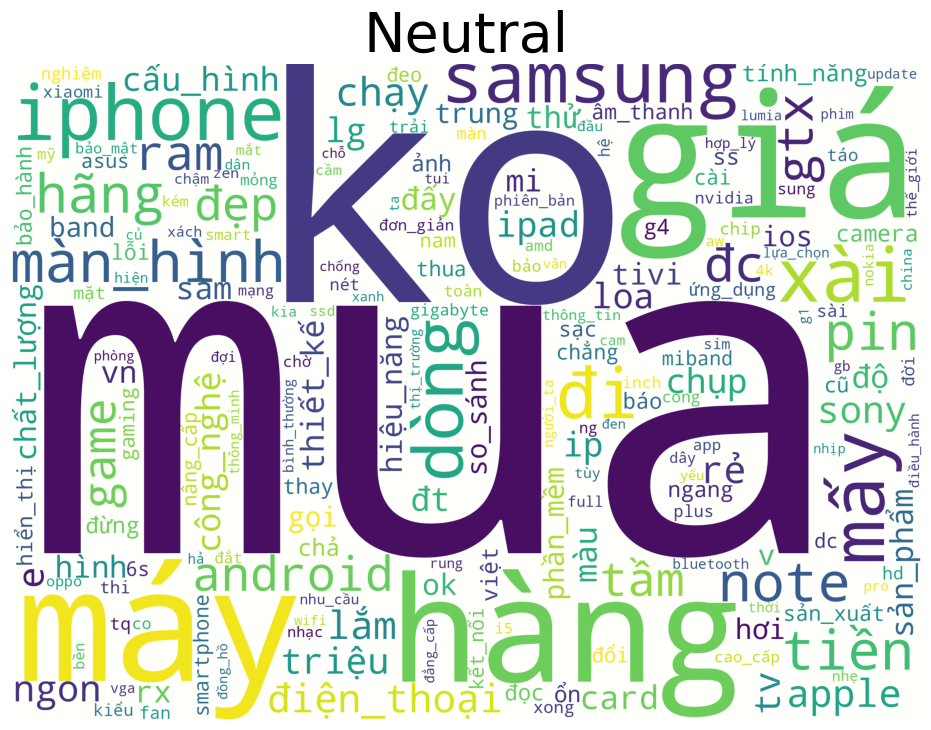

In [18]:
# Source
plt.figure(figsize=(40,25))

subset = train_data[train_data.Neu==1]
text = subset.Data.values
cloud_Source = WordCloud(
                          background_color='#fffffc',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Neutral",fontsize=40)
plt.imshow(cloud_Source)

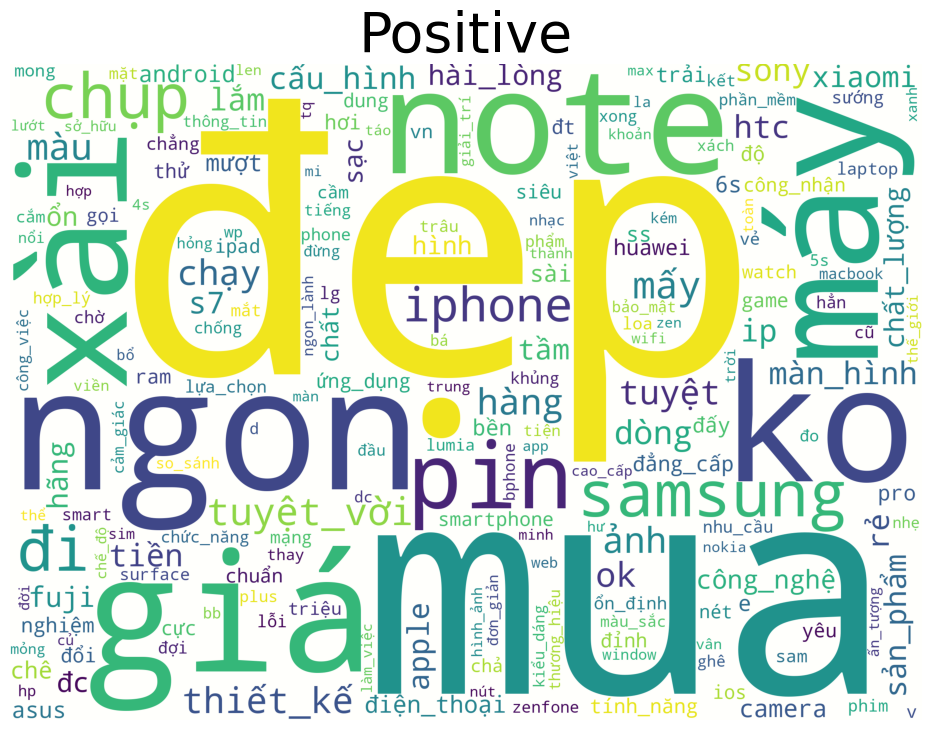

In [19]:
# Sink
plt.figure(figsize=(40,25))

subset = train_data[train_data.Pos==1]
text = subset.Data.values
cloud_Sink = WordCloud(
                          background_color='#fffffc',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Positive",fontsize=40)
plt.imshow(cloud_Sink)

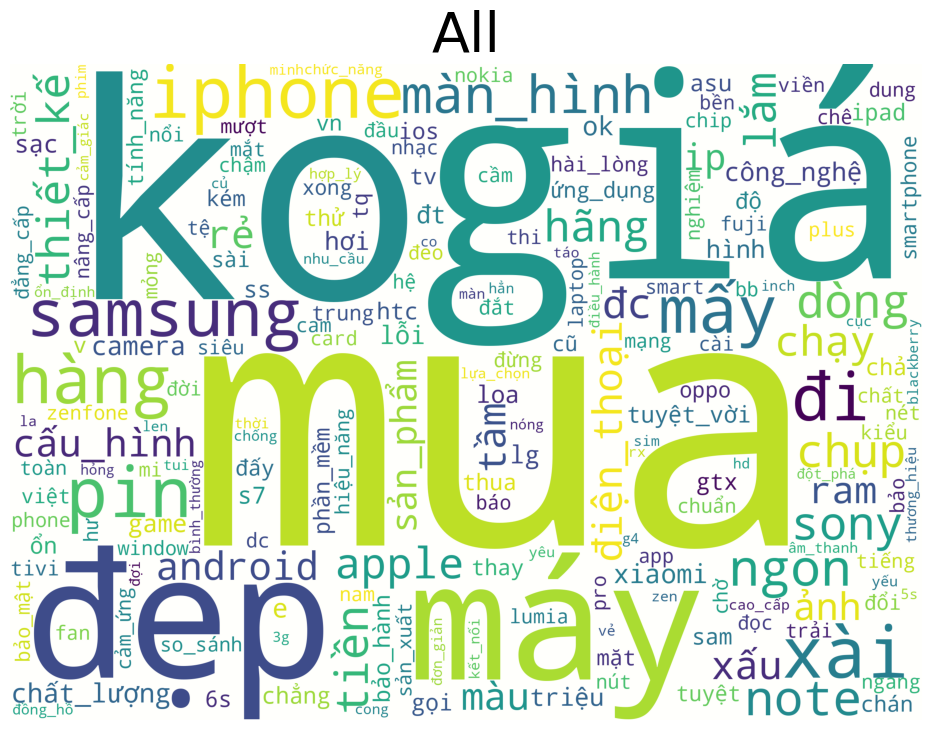

In [20]:
# All
plt.figure(figsize=(40,25))

#subset = train_df[train_df.Sink==1]
text = train_data['Data'].values
cloud_All = WordCloud(
                          background_color='#fffffc',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("All",fontsize=40)
plt.imshow(cloud_All)

ĐẾM SỐ LƯỢNG TỪ TRONG TẬP DỮ LIỆU TỔNG

In [21]:
text

array(['iphone 7 hình hok muaxấu chữ xấu chữ tệhết thời',
       'hot iphone viện thăm nokia đi',
       'thực mới_mẻ nhàm_chán đột_phá ngoại_hình_như samsung cấu_hình chả ip6 trở đi chán lên_đời máy tí',
       ..., 'giúp android vượt_trội ios cứu hệ sinh_thái android thỳ hơi',
       'mẹ đài_loan mua 1 iphone6 plus i đổi máy chờ quen',
       'tùng minh nguyễn điện_thoại vk = may cảm_ứng'], dtype=object)

In [22]:
All_words = []
for i in range(0,len(text)):
  tempt = text[i].split()
  for j in range(0,len(tempt)):
    All_words.append(tempt[j])

In [23]:
#So luong từ khi chưa xóa trùng
print('Số lượng từ khi chưa xóa trùng',len(All_words))
#Số lượng từ khi xóa trùng
unique_l=list(set(All_words))
print('Số lượng từ khi chưa xóa trùng',len(unique_l))

Số lượng từ khi chưa xóa trùng 58696
Số lượng từ khi chưa xóa trùng 8795


In [24]:
import collections

In [25]:
count_words_All_words = collections.Counter(All_words)

In [ ]:
count_words_All_words

In [27]:
print(count_words_All_words.most_common())

[('mua', 1095), ('ko', 768), ('giá', 668), ('1', 662), ('đẹp', 593), ('máy', 535), ('2', 478), ('iphone', 423), ('xài', 419), ('pin', 401), ('hàng', 365), ('đi', 361), ('mấy', 361), ('samsung', 358), ('màn_hình', 335), ('ngon', 318), ('note', 289), ('dòng', 271), ('sony', 264), ('chụp', 254), ('tiền', 251), ('thiết_kế', 237), ('3', 231), ('hãng', 229), ('lắm', 225), ('apple', 221), ('chạy', 210), ('đc', 209), ('điện_thoại', 196), ('rẻ', 188), ('xấu', 186), ('tầm', 184), ('android', 179), ('cấu_hình', 174), ('ảnh', 170), ('5', 169), ('màu', 169), ('ram', 167), ('4', 160), ('7', 156), ('k', 155), ('sản_phẩm', 154), ('ip', 151), ('chất_lượng', 150), ('xiaomi', 147), ('camera', 145), ('ok', 145), ('e', 144), ('lỗi', 138), ('công_nghệ', 137), ('hơi', 134), ('10', 133), ('hình', 132), ('đt', 132), ('triệu', 132), ('lg', 132), ('6', 128), ('sạc', 128), ('game', 124), ('loa', 123), ('s7', 120), ('ss', 116), ('asus', 115), ('htc', 113), ('chả', 112), ('chẳng', 111), ('ổn', 110), ('gọi', 109), (

In [ ]:
len(count_words_All_words)

8795

In [28]:
train_data['word_count'] = train_data['Data_words'].apply(lambda x: len(str(x).split()))
train_data['review_len'] = train_data['Data'].astype(str).apply(len)

In [29]:
train_data.head()

,Data,Data_words,Class,Neg,Neu,Pos,word_count,review_len
0,iphone 7 hình hok muaxấu chữ xấu chữ tệhết thời,"[iphone, 7, hình, hok, muaxấu, chữ, xấu, chữ, ...",-1,1,0,0,10,47
1,hot iphone viện thăm nokia đi,"[hot, iphone, viện, thăm, nokia, đi]",-1,1,0,0,6,29
2,thực mới_mẻ nhàm_chán đột_phá ngoại_hình_như s...,"[thực, mới_mẻ, nhàm_chán, đột_phá, ngoại_hình_...",-1,1,0,0,15,96
3,chuẩn ko cửa note note phá ki lục doanh sốnote...,"[chuẩn, ko, cửa, note, note, phá, ki, lục, doa...",-1,1,0,0,14,61
4,lương 21tr mua iphone đắt chán thay đồng_tiền lo,"[lương, 21tr, mua, iphone, đắt, chán, thay, đồ...",-1,1,0,0,9,48
